In [12]:
from textblob import TextBlob
import pandas as pd
import numpy as np
from textblob.classifiers import NaiveBayesClassifier
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Iryna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Iryna\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Iryna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Rule-based sentiment analysis

Load datasets, checking.

In [3]:
df_train = pd.read_csv("amazon_reviews_train.csv", encoding="utf-8")
df_test = pd.read_csv("amazon_reviews_test.csv", encoding="utf-8")

In [4]:
df_train.head()

,sentiment,review
0,negative,Product arrived labeled as Jumbo Salted Peanut...
1,positive,This is a confection that has been around a fe...
2,negative,If you are looking for the secret ingredient i...
3,positive,Great taffy at a great price. There was a wid...
4,positive,This saltwater taffy had great flavors and was...


In [5]:
print("Train dataset length: ", len(df_train))

Train dataset length:  48902


In [6]:
df_test.head()

,sentiment,review
0,negative,I was going to give these seeds a 3-star ratin...
1,positive,"This is a nice smooth coffee, a part of the Ke..."
2,positive,I order this pearl sugar to make liege waffle....
3,negative,Used these in a waffle recipe that said they w...
4,positive,"Mayonnaise is an interesting product, cool, sm..."


In [7]:
print("Test dataset length: ", len(df_test))

Test dataset length:  2417


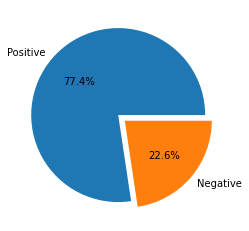

In [34]:
# Train dataset pos/neg distribution
y = np.array(df_train['sentiment'].value_counts())

plt.pie(y, labels=["Positive", "Negative"],explode = (0, 0.1), autopct='%1.1f%%')
plt.show() 

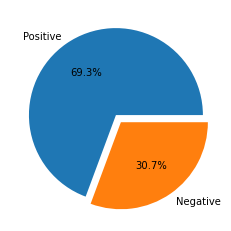

In [35]:
# Test dataset pos/neg distribution
y = np.array(df_test['sentiment'].value_counts())

plt.pie(y, labels=["Positive", "Negative"],explode = (0, 0.1), autopct='%1.1f%%')
plt.show() 

Precision of TextBlob

In [8]:
reviews = np.array(df_test[:100])

counter = 0
for sent, rev in reviews:
    polarity = TextBlob(rev).sentiment.polarity
    prediction = "positive" if polarity > 0 else "negative"
    if sent == prediction:
        counter += 1
accuracy = counter / len(reviews)

print("TextBlob accuracy = ", accuracy)

TextBlob accuracy =  0.77


Precision of VaderSentiment

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [10]:
analyzer = SentimentIntensityAnalyzer()
    
counter = 0
for sent, rev in reviews:
    vs = analyzer.polarity_scores(rev)
#     prediction = "positive" if vs["pos"] > vs["neg"] else "negative"
    prediction = "positive" if vs["compound"] > 0 else "negative"
    if sent == prediction:
        counter += 1
precision = counter / len(reviews)

print("VaderSentiment precision = ", precision)

VaderSentiment precision =  0.78


In [22]:
df_dict = pd.read_csv("NCR-lexicon.csv", encoding="utf-8")

In [23]:
df_dict.head()


,English,Positive,Negative
0,aback,0,0
1,abacus,0,0
2,abandon,0,1
3,abandoned,0,1
4,abandonment,0,1


In [31]:
df_dict['Positive'].value_counts()[1]

2312

In [32]:
df_dict['Negative'].value_counts()[1]

3324

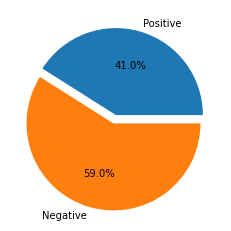

In [33]:
# Dictionary pos/neg distribution
y = np.array([df_dict['Positive'].value_counts()[1], df_dict['Negative'].value_counts()[1]])

plt.pie(y, labels=["Positive", "Negative"],explode = (0, 0.1), autopct='%1.1f%%')
plt.show() 

In [13]:
import collections

In [14]:
word = "abandon"
# positive = ((df_dict.loc[df_dict['English'] == word, 'Positive']))
positive = df_dict[df_dict['English']==word]['Positive'].values[0]
print((positive))

0


In [ ]:

# reviews = np.array(df_test)
# df_try.head()
# freq=collections.Counter(reviews.iloc[0]["review"].split())
# print(type(freq))

# example = reviews.iloc[0]["review"]

In [16]:
# returns integer
def getSentiment(text):
    freq=collections.Counter(text.split())
#     print(freq)

    count = 0
    for word in freq:
        
        positive = df_dict[df_dict['English']==word]['Positive']
        negative = df_dict[df_dict['English']==word]['Negative']
        if len(positive) > 0:
            count += positive.values[0]
        if len(negative) > 0:
            count -= negative.values[0]
        
    return(count)

In [17]:
def getPrecision(dataset):
    counter = 0
    for sent, rev in reviews:
        
        prediction = "positive" if getSentiment(rev)>0 else "negative"
        
        if sent == prediction:
            counter += 1
            
    return counter / len(reviews)

# !!! --- Important: resource consuming operations below
print("GetSentiment precision = ", getPrecision(reviews))

GetSentiment precision =  0.69


In [18]:
def getPrecisionL(dataset):
    counter = 0
    for sent, rev in reviews:
        
        text = TextBlob(rev)
        lemmatized_text = " ". join([w.lemmatize() for w in text.words])
        prediction = "positive" if getSentiment(lemmatized_text)>0 else "negative"
        
        if sent == prediction:
            counter += 1
            
    return counter / len(reviews)

# !!! --- Important: resource consuming operations below
print("GetSentiment Lemmatizated precision = ", getPrecisionL(reviews))

GetSentiment Lemmatizated precision =  0.69


TextBlob precision =  0.7641704592470004

VaderSentiment precision =  0.7931319817956144

GetSentiment precision =  0.6379809681423252

GetSentiment Lemmatizated precision =  0.6652875465453041


In [19]:
from nltk.tokenize import sent_tokenize

In [20]:
# negatives = ["no", "not", "doesn't", "isn't", "wasn't", "shouldn't", "wouldn't", "couldn't", "won't", "can't", "don't",
#             "none", "nobody", "nothing", "neither", "nowhere", "never",
#             "hardly", "scarcely", "barely"]
negatives = ["no", "not", "No", "Not", "none"]

def getSentimentNegation(text):
    sentences = sent_tokenize(text)
#     print(sentences)
    count = 0
    for sentence in sentences:
        # use lemmatization
#         sentence = TextBlob(sentence) 
#         " ". join([w.lemmatize() for w in sentence.words])
        
        negation = False
        words = sentence.split()
#         print(words)
        for word in words:
            # check if the word is negative
            if word  in negatives:
                # then polarity should be switched to opposite
                negation = True
#                 print("Negative! ", word)
                # and should not evaluate the negation itself
                continue
            positive = df_dict[df_dict['English']==word]['Positive']
            negative = df_dict[df_dict['English']==word]['Negative']
#             print(positive)
#             print(negative)
            
            if len(positive) > 0:
                # if there was negation, the polarity opposite
                if negation:
                    count -= positive.values[0]
                else:
                    count += positive.values[0]
            if len(negative) > 0:
                if negation:
                    count += negative.values[0]
                else:
                    count -= negative.values[0]
            negation = False  
    return(count)

In [36]:
textNeutral = " not good bad"
textPositive = "The striped bats are good hanging on their feet for best. The striped bats are hanging on their feet for best. "
textPositiveNeg = "The no striped bats good are hanging on their feet for best. The striped no good good bats are good hanging on their feet for best. "
print(getSentimentNegation(textNeutral))
# print(getSentimentNegation(textPositive))
# print(getSentimentNegation(textPositiveNeg))

-2


In [37]:
def getPrecisionNegation(dataset):
    counter = 0
    for sent, rev in reviews:
        
        prediction = "positive" if getSentimentNegation(rev)>0 else "negative"
        
        if sent == prediction:
            counter += 1
#         print(sent, "->", prediction)
    return counter / len(reviews)

# !!! --- Important: resource consuming operations below
reviews = np.array(df_test[:100])
print("GetSentiment precision = ", getPrecisionNegation(reviews))

GetSentiment precision =  0.7


In [23]:
# Lemmatize a sentence
sentence = "The striped bats are hanging on their feet for best"
sent = TextBlob(sentence) 
" ". join([w.lemmatize() for w in sent.words])

'The striped bat are hanging on their foot for best'

In [24]:
# Define function to lemmatize each word with its POS tag
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

# Lemmatize
sentence = "The striped bats are hanging on their feet for best"
lemmatize_with_postag(sentence)
#> 'The striped bat be hang on their foot for best'

'The striped bat be hang on their foot for best'

In [25]:
print(nltk.pos_tag(nltk.word_tokenize(sentence)))

[('The', 'DT'), ('striped', 'JJ'), ('bats', 'NNS'), ('are', 'VBP'), ('hanging', 'VBG'), ('on', 'IN'), ('their', 'PRP$'), ('feet', 'NNS'), ('for', 'IN'), ('best', 'JJS')]
